In [1]:
import csv
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
userData = pd.read_csv("user_metaData.csv")
userData.head()

,user_id,age,occupation,gender
0,1,34,sales/marketing,M
1,2,33,college/grad student,M
2,3,29,scientist,M
3,4,30,other or not specified,M
4,5,26,scientist,M


In [3]:
#Missing values
userData.isnull().sum()

user_id       0
age           0
occupation    0
gender        0
dtype: int64

In [4]:
#Exploring the data
print('Number of users: ' + str(userData.user_id.nunique()))
print('Age range: ' + str(userData.age.min())+" to " + str(userData.age.max()))
print('Number of users by gender: ')
pd.DataFrame(userData.groupby('gender')['user_id'].size())

Number of users: 1000000
Age range: 8 to 90
Number of users by gender: 


,user_id
gender,
F,170040
M,829960


In [5]:
#Ratings data
rating = pd.read_csv("rating.csv", names= ["user_id", "movie", "rating"] , header = None)
rating.head()

,user_id,movie,rating
0,16541,apollo+13+1995,4
1,84312,dead+men+dont+wear+plaid+1982,3
2,836903,the+shawshank+redemption+1994,4
3,309358,american+beauty+1999,4
4,172398,outbreak+1995,3


In [6]:
#Missing values
rating.isnull().sum()

user_id    0
movie      0
rating     0
dtype: int64

In [7]:
#Exploring the data
print('Number of records: '+ str(len(rating.index)))
print('Number of users who provided ratings: ' + str(rating.user_id.nunique()))

Number of records: 2057000
Number of users who provided ratings: 182751


In [9]:
#Movie data
movieData = pd.read_csv("movie_meta_un.csv", names = ["movie_id", "movie_meta"] , header=None)
movieData.head()

,movie_id,movie_meta
0,west+side+story+1961,"{""id"":""west+side+story+1961"",""tmdb_id"":1725,""i..."
1,eat+pray+love+2010,"{""id"":""eat+pray+love+2010"",""tmdb_id"":38167,""im..."
2,the+shawshank+redemption+1994,"{""id"":""the+shawshank+redemption+1994"",""tmdb_id..."
3,any+given+sunday+1999,"{""id"":""any+given+sunday+1999"",""tmdb_id"":9563,""..."
4,men+in+black+ii+2002,"{""id"":""men+in+black+ii+2002"",""tmdb_id"":608,""im..."


In [10]:
#Missing values
movieData.isnull().sum()

movie_id      0
movie_meta    0
dtype: int64

In [11]:
#Understanding the data
print('Number of records: '+ str(len(movieData.index)))
print('Number of unique movies: '+ str(movieData.movie_id.nunique()))

Number of records: 20000
Number of unique movies: 20000


In [12]:
#Instance of movie_meta
movieData.movie_meta[0]

'{"id":"west+side+story+1961","tmdb_id":1725,"imdb_id":"tt0055614","title":"West Side Story","original_title":"West Side Story","adult":"False","belongs_to_collection":{},"budget":"6000000","genres":[{"id":80,"name":"Crime"},{"id":18,"name":"Drama"},{"id":10402,"name":"Music"}],"homepage":"null","original_language":"en","overview":"In the slums of the upper West Side of Manhattan, New York, a gang of Polish-American teenagers called the Jets compete with a rival gang of recently immigrated Puerto Ricans, the Sharks, to \\"own\\" the neighborhood streets. Tensions are high between the gangs but two kids, one from each rival gang, fall in love leading to tragedy.","popularity":"8.389903","poster_path":"/2apEtTvPUFHW2MDEfEhmJldrhcb.jpg","production_companies":[{"name":"United Artists","id":60},{"name":"Seven Arts","id":8268},{"name":"Mirisch Pictures","id":90571}],"production_countries":[{"iso_3166_1":"US","name":"United States of America"}],"release_date":"1961-10-18","revenue":"43656822

In [13]:
#Convert to dictionary and split columns
movieData.movie_meta = movieData.movie_meta.apply(lambda x: eval(x))
movieData = pd.concat((movieData, pd.DataFrame(movieData['movie_meta'].values.tolist())),axis=1)

#Split to get year column
movieData['year'] = movieData['movie_id'].str.rsplit('+', 1, expand=True)[1]
movieData.head()

,movie_id,movie_meta,id,tmdb_id,imdb_id,title,original_title,adult,belongs_to_collection,budget,...,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count,message,year
0,west+side+story+1961,"{'id': 'west+side+story+1961', 'tmdb_id': 1725...",west+side+story+1961,1725.0,tt0055614,West Side Story,West Side Story,False,{},6000000,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1961-10-18,43656822,152.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,7.0,399,NaN,1961
1,eat+pray+love+2010,"{'id': 'eat+pray+love+2010', 'tmdb_id': 38167,...",eat+pray+love+2010,38167.0,tt0879870,Eat Pray Love,Eat Pray Love,False,{},60000000,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-08-12,204594016,133.0,"[{'iso_639_1': 'pt', 'name': 'Português'}, {'i...",Released,5.8,655,NaN,2010
2,the+shawshank+redemption+1994,"{'id': 'the+shawshank+redemption+1994', 'tmdb_...",the+shawshank+redemption+1994,278.0,tt0111161,The Shawshank Redemption,The Shawshank Redemption,False,{},25000000,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1994-09-23,28341469,142.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,8.5,8358,NaN,1994
3,any+given+sunday+1999,"{'id': 'any+given+sunday+1999', 'tmdb_id': 956...",any+given+sunday+1999,9563.0,tt0146838,Any Given Sunday,Any Given Sunday,False,{},55000000,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1999-12-16,100230832,163.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,6.8,430,NaN,1999
4,men+in+black+ii+2002,"{'id': 'men+in+black+ii+2002', 'tmdb_id': 608,...",men+in+black+ii+2002,608.0,tt0120912,Men in Black II,Men in Black II,False,"{'id': 86055, 'name': 'Men In Black Collection...",140000000,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2002-07-03,441818803,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,6.1,3188,NaN,2002


In [14]:
movieData.movie_meta[0]

{'id': 'west+side+story+1961',
 'tmdb_id': 1725,
 'imdb_id': 'tt0055614',
 'title': 'West Side Story',
 'original_title': 'West Side Story',
 'adult': 'False',
 'belongs_to_collection': {},
 'budget': '6000000',
 'genres': [{'id': 80, 'name': 'Crime'},
  {'id': 18, 'name': 'Drama'},
  {'id': 10402, 'name': 'Music'}],
 'homepage': 'null',
 'original_language': 'en',
 'overview': 'In the slums of the upper West Side of Manhattan, New York, a gang of Polish-American teenagers called the Jets compete with a rival gang of recently immigrated Puerto Ricans, the Sharks, to "own" the neighborhood streets. Tensions are high between the gangs but two kids, one from each rival gang, fall in love leading to tragedy.',
 'popularity': '8.389903',
 'poster_path': '/2apEtTvPUFHW2MDEfEhmJldrhcb.jpg',
 'production_companies': [{'name': 'United Artists', 'id': 60},
  {'name': 'Seven Arts', 'id': 8268},
  {'name': 'Mirisch Pictures', 'id': 90571}],
 'production_countries': [{'iso_3166_1': 'US',
   'name':

In [15]:
#Change genres column to multiple columns of 0 and 1 - TBD
movieData.genres[0]

[{'id': 80, 'name': 'Crime'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10402, 'name': 'Music'}]

In [16]:
#Most popular movies by rating
#by median
df_median = pd.DataFrame(rating.groupby(['movie'])['rating'].median())
counts = pd.DataFrame(rating.groupby(['movie']).size().reset_index(name='counts'))
df_merge = pd.merge(df_median, counts, how ='left', on='movie')
df_top_20_median = df_merge.sort_values(['rating','counts'], ascending = False)[:20]
df_top_20_median

,movie,rating,counts
11943,the+shawshank+redemption+1994,5.0,12784
8542,schindlers+list+1993,5.0,8861
12261,the+usual+suspects+1995,5.0,7601
10673,the+godfather+1972,5.0,6639
5929,life+is+beautiful+1997,5.0,2237
168,8+1963,5.0,302
1540,black+cat_+white+cat+1998,5.0,136
9187,stalker+1979,5.0,136
1338,before+the+rain+1994,5.0,124
7607,persona+1966,5.0,84


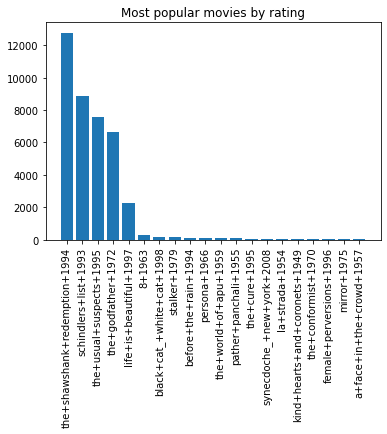

In [17]:
plt.bar(df_top_20_median['movie'],df_top_20_median['counts'])
plt.xticks(rotation=90)
plt.title('Most popular movies by rating')
plt.show()

In [18]:
#Top Movies by popularity
df = movieData.sort_values(['popularity'], ascending = False)[:20][['movie_id','popularity']]
df

,movie_id,popularity
184,blade+runner+1982,96.272374
3218,dinosaur+2000,9.998415
3106,jarhead+2005,9.997032
1356,the+last+kiss+2006,9.996541
7644,dream+house+2011,9.995617
730,hamlet+1996,9.994088
3499,4+months_+3+weeks+and+2+days+2007,9.990406
13399,black+sea+2014,9.989679
5857,hollywood+ending+2002,9.987317
1739,uncommon+valor+1983,9.987072


In [19]:
#Popularity by year
year_sort = movieData.sort_values(['year','popularity'], ascending = False)
x = year_sort.groupby('year').head(10)[['year','title','popularity']]
x

,year,title,popularity
18311,2016,Last Days in the Desert,6.641951
16815,2016,The Bronze,5.353826
14781,2016,Punk's Dead: SLC Punk 2,0.700489
15534,2015,Dead Rising: Watchtower,9.559969
4486,2015,Frozen Fever,9.509334
...,...,...,...
19113,,Bad Chicken,0.007875
13983,,War Stories Our Mother Never Told Us,0.005625
9230,,Divine Intervention,0.001181
16434,,Getting Back to Abnormal,0.000177


In [20]:
#Popularity by gender
pop_gender = pd.DataFrame(rating_user.groupby(['movie','gender'])['rating'].median())
counts = pd.DataFrame(rating_user.groupby(['movie','gender']).size().reset_index(name='counts'))
df_merge = pd.merge(pop_gender, counts, how ='left', on=['movie','gender'])
pop_gender_sort = df_merge.sort_values(['gender','rating','counts'], ascending = False)
pop_gender = pop_gender_sort.groupby('gender').head(10)[['gender', 'movie', 'rating', 'counts']]
pop_gender

,gender,movie,rating,counts
19378,M,the+shawshank+redemption+1994,5.0,11180
13857,M,schindlers+list+1993,5.0,7387
19888,M,the+usual+suspects+1995,5.0,6720
17296,M,the+godfather+1972,5.0,5680
17298,M,the+godfather+part+ii+1974,5.0,3216
9604,M,life+is+beautiful+1997,5.0,1531
277,M,8+1963,5.0,215
21303,M,waking+life+2001,5.0,144
14903,M,stalker+1979,5.0,121
2189,M,before+the+rain+1994,5.0,88


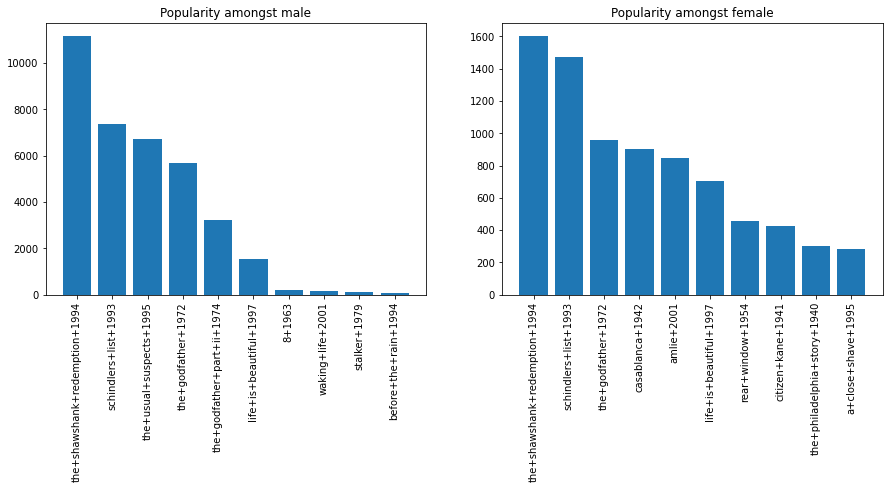

In [21]:
plt.subplots(nrows = 1, ncols=2 ,figsize=(15,5))
plt.subplot(1,2,1)
pop_gender_m = pop_gender[pop_gender.gender=='M']
plt.bar(pop_gender_m['movie'],pop_gender_m['counts'])
plt.title('Popularity amongst male')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
pop_gender_f = pop_gender[pop_gender.gender=='F']
plt.bar(pop_gender_f['movie'],pop_gender_f['counts'])
plt.xticks(rotation=90)
plt.title('Popularity amongst female')
plt.show()

In [23]:
movieData.columns

Index(['movie_id', 'movie_meta', 'id', 'tmdb_id', 'imdb_id', 'title',
       'original_title', 'adult', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'original_language', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'vote_average', 'vote_count', 'message', 'year'],
      dtype='object')

In [26]:
#Create ADS
rating_user = pd.merge(rating, userData, on='user_id', how= 'left')
movie_select_features = movieData[['movie_id','adult', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'original_language', 'overview', 'popularity', 'revenue', 'runtime','status',
       'vote_average', 'vote_count', 'message', 'year']]
rating_user_movie = pd.merge(rating_user, movie_select_features, left_on ='movie', right_on='movie_id', how='left')

In [30]:
rating_user_movie.head()

,user_id,movie,rating,age,occupation,gender,movie_id,adult,belongs_to_collection,budget,...,original_language,overview,popularity,revenue,runtime,status,vote_average,vote_count,message,year
0,16541,apollo+13+1995,4,30,college/grad student,F,apollo+13+1995,False,{},52000000,...,en,The true story of technical troubles that scut...,18.761467,355237933,140.0,Released,7.3,1637,NaN,1995
1,84312,dead+men+dont+wear+plaid+1982,3,34,sales/marketing,M,dead+men+dont+wear+plaid+1982,False,{},0,...,en,Juliet Forrest is convinced that the reported ...,5.515136,18196170,89.0,Released,6.5,104,NaN,1982
2,836903,the+shawshank+redemption+1994,4,32,executive/managerial,M,the+shawshank+redemption+1994,False,{},25000000,...,en,Framed in the 1940s for the double murder of h...,51.645403,28341469,142.0,Released,8.5,8358,NaN,1994
3,309358,american+beauty+1999,4,36,executive/managerial,M,american+beauty+1999,False,{},15000000,...,en,"Lester Burnham, a depressed suburban father in...",20.726578,356296601,122.0,Released,7.9,3438,NaN,1999
4,172398,outbreak+1995,3,31,college/grad student,M,outbreak+1995,False,{},50000000,...,en,A deadly airborne virus finds its way into the...,13.676444,189859560,127.0,Released,6.4,522,NaN,1995


In [29]:
rating_user_movie.count()

user_id                  2057000
movie                    2057000
rating                   2057000
age                      2057000
occupation               2057000
gender                   2057000
movie_id                 2056786
adult                    2055151
belongs_to_collection    2055151
budget                   2055151
genres                   2055151
homepage                 2055151
original_language        2055151
overview                 2055151
popularity               2055151
revenue                  2055151
runtime                  2055151
status                   2055151
vote_average             2055151
vote_count               2055151
message                     1635
year                     2056786
dtype: int64

In [33]:
rating_user_movie.to_csv("rating_user_movie.csv", index =False)